# Full Statistical Equilibrium


2020.6.19    Kouui

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../")
from src.Structure import AtomCls, AtmosphereCls
from src.Atomic import LTELib, ColExcite, SEsolver
#from src.RadiativeTransfer import Thin

---

## steps to use an `atom` class

In [3]:
folder = "../data/atom/Ca_II/"
file     = folder + "Ca_II.Level"
file_Aji = folder + "Einstein_A/Nist.Aji"
file_CEe = folder + "Collisional_Excitation/RH.Electron"
file_CIe = folder + "Collisional_Ionization/RH.Electron"
file_PI  = folder + "Photoionization/RH.Alpha"
file_Rad = folder + "Ca_II.RadiativeLine"
atom = AtomCls.Atom(file, _file_Aji=file_Aji, _file_CEe=file_CEe)
atom.read_CI(_path_electron=file_CIe)
atom.read_PI(_path_alpha=file_PI)
atom.read_Mesh(_path=file_Rad)
atom.make_Mesh()
atom.read_Radiative_Line_intensity(_folder="../data/intensity/Ca_II/")

Reading Einstein Aji coefficient from : 
 ../data/atom/Ca_II/Einstein_A/Nist.Aji
...
Finished.

Reading Electron impact Effective Collisional Strength from : 
 ../data/atom/Ca_II/Collisional_Excitation/RH.Electron
...
Finished.

Reading Electron impact Collisional Ionization coefficient from : 
 ../data/atom/Ca_II/Collisional_Ionization/RH.Electron
...
Finished.

Reading Photoionization cross section from : 
 ../data/atom/Ca_II/Photoionization/RH.Alpha
...
Finished.

Reading wavelength mesh information from : 
 ../data/atom/Ca_II/Ca_II.RadiativeLine
...
line mesh prepared.
continuum mesh prepared.


In [4]:
del atom

minimum request : 
- level information
- Einstein Aji
- Collisional excitation

In [5]:
folder = "../data/atom/Ca_II/"
file     = folder + "Ca_II.Level"
file_Aji = folder + "Einstein_A/Nist.Aji"
file_CEe = folder + "Collisional_Excitation/RH.Electron"
atom = AtomCls.Atom(file, _file_Aji=file_Aji, _file_CEe=file_CEe)

Reading Einstein Aji coefficient from : 
 ../data/atom/Ca_II/Einstein_A/Nist.Aji
...
Finished.

Reading Electron impact Effective Collisional Strength from : 
 ../data/atom/Ca_II/Collisional_Excitation/RH.Electron
...
Finished.



In [6]:
atom.Z, atom.Element

('20', 'Ca')

Level information

In [7]:
atom.Level

rec.array([(9.79436203e-12, 2, 2), (1.25066388e-11, 4, 2),
           (1.25187032e-11, 6, 2), (1.47999303e-11, 2, 2),
           (1.48442305e-11, 4, 2), (2.88149222e-11, 1, 3)],
          dtype=[('erg', '<f8'), ('g', 'u1'), ('stage', 'u1')])

Level and Line indentification (**important**)

In [8]:
atom.Level_info_table

(('1s2.2s2.2p6.3s2.3p6.4s', '2S', '1/2'),
 ('1s2.2s2.2p6.3s2.3p6.3d', '2D', '3/2'),
 ('1s2.2s2.2p6.3s2.3p6.3d', '2D', '5/2'),
 ('1s2.2s2.2p6.3s2.3p6.4p', '2P', '1/2'),
 ('1s2.2s2.2p6.3s2.3p6.4p', '2P', '3/2'),
 ('1s2.2s2.2p6.3s2.3p6', '1S', '0'))

Line information

In [9]:
atom.Line

rec.array([(0, 1, 1.30e+00, 4.09334222e+14, 7.32390414e-05, 7.32390414e+03, 0),
           (0, 2, 1.30e+00, 4.11154968e+14, 7.29147118e-05, 7.29147118e+03, 0),
           (0, 3, 1.40e+08, 7.55435595e+14, 3.96847146e-05, 3.96847146e+03, 0),
           (0, 4, 1.47e+08, 7.62121336e+14, 3.93365788e-05, 3.93365788e+03, 0),
           (0, 5, 0.00e+00, 2.87056483e+15, 1.04436750e-05, 1.04436750e+03, 1),
           (1, 2, 0.00e+00, 1.82074624e+12, 1.64653620e-02, 1.64653620e+06, 0),
           (1, 3, 1.06e+07, 3.46101373e+14, 8.66198413e-05, 8.66198413e+03, 0),
           (1, 4, 1.11e+06, 3.52787115e+14, 8.49782908e-05, 8.49782908e+03, 0),
           (1, 5, 0.00e+00, 2.46123061e+15, 1.21805921e-05, 1.21805921e+03, 1),
           (2, 3, 0.00e+00, 3.44280627e+14, 8.70779349e-05, 8.70779349e+03, 0),
           (2, 4, 9.90e+06, 3.50966368e+14, 8.54191419e-05, 8.54191419e+03, 0),
           (2, 5, 0.00e+00, 2.45940986e+15, 1.21896096e-05, 1.21896096e+03, 1),
           (3, 4, 0.00e+00, 6.68574151e+

collisional excitation coeficient and table for interpolation

In [10]:
atom.CE_coe

rec.array([(0, 1,   1,  1, 2, 4, 2.71227673e-12),
           (0, 2,   1,  1, 2, 6, 2.72434112e-12),
           (0, 3,   1,  1, 2, 2, 5.00556826e-12),
           (0, 4,   1,  1, 2, 4, 5.04986845e-12),
           (0, 5,   0,  0, 2, 1, 1.90205602e-11),
           (1, 2,   1,  1, 4, 6, 1.20643899e-14),
           (1, 3,   1,  1, 4, 2, 2.29329153e-12),
           (1, 4,   1,  1, 4, 4, 2.33759171e-12),
           (1, 5,   0,  0, 4, 1, 1.63082834e-11),
           (2, 3,   1,  1, 6, 2, 2.28122714e-12),
           (2, 4,   1,  1, 6, 4, 2.32552732e-12),
           (2, 5, 254,  7, 6, 1, 1.62962191e-11),
           (3, 4,   1,  1, 2, 4, 4.43001835e-14),
           (3, 5, 240, 31, 2, 1, 1.40149919e-11),
           (4, 5,   0,  0, 4, 1, 1.39706917e-11)],
          dtype=[('idxI', 'u1'), ('idxJ', 'u1'), ('f1', 'u1'), ('f2', 'u1'), ('gi', 'u1'), ('gj', 'u1'), ('dEij', '<f8')])

In [11]:
atom.CE_table

array([[ 2.378 ,  2.284 ,  2.203 ,  1.92  ,  1.961 ,  1.846 ],
       [ 3.568 ,  3.426 ,  3.304 ,  2.879 ,  2.942 ,  2.77  ],
       [ 4.842 ,  5.288 ,  5.548 ,  6.148 ,  8.482 , 12.    ],
       [ 9.683 , 10.58  , 11.1   , 12.3   , 16.96  , 24.01  ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 1.778 ,  2.869 ,  4.693 , 12.66  ,  3.189 ,  7.926 ],
       [13.6   , 14.33  , 14.96  , 16.99  , 22.8   , 28.36  ],
       [ 6.316 ,  6.488 ,  6.623 ,  7.033 ,  8.08  ,  8.899 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 4.338 ,  4.282 ,  4.203 ,  3.929 ,  3.315 ,  2.641 ],
       [25.04  , 26.36  , 27.51  , 31.22  , 42.17  , 52.84  ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.8511,  1.364 ,  1.878 ,  4.002 , 11.11  , 18.73  ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ]])

collisional ionization coeficient and table for interpolation

In [12]:
file_CIe = folder + "Collisional_Ionization/RH.Electron"
atom.read_CI(_path_electron=file_CIe)

Reading Electron impact Collisional Ionization coefficient from : 
 ../data/atom/Ca_II/Collisional_Ionization/RH.Electron
...
Finished.



In [13]:
atom.CI_coe

rec.array([(0, 5,  4, 1, 2, 1, 1.90205602e-11),
           (1, 5,  8, 1, 4, 1, 1.63082834e-11),
           (2, 5, 11, 1, 6, 1, 1.62962191e-11),
           (3, 5, 13, 1, 2, 1, 1.40149919e-11),
           (4, 5, 14, 1, 4, 1, 1.39706917e-11)],
          dtype=[('idxI', 'u1'), ('idxJ', 'u1'), ('lineIndex', '<u2'), ('f2', 'u1'), ('gi', 'u1'), ('gj', 'u1'), ('dEij', '<f8')])

In [14]:
atom.CI_table

array([[4.580e-12, 4.580e-12, 4.580e-12, 4.580e-12, 4.580e-12, 4.580e-12],
       [1.613e-10, 1.613e-10, 1.613e-10, 1.613e-10, 1.613e-10, 1.613e-10],
       [1.614e-10, 1.614e-10, 1.614e-10, 1.614e-10, 1.614e-10, 1.614e-10],
       [7.272e-11, 7.272e-11, 7.272e-11, 7.272e-11, 7.272e-11, 7.272e-11],
       [7.295e-11, 7.295e-11, 7.295e-11, 7.295e-11, 7.295e-11, 7.295e-11]])

photoionization cross section and table for interpolation

In [15]:
file_PI  = folder + "Photoionization/RH.Alpha"
atom.read_PI(_path_alpha=file_PI)

Reading Photoionization cross section from : 
 ../data/atom/Ca_II/Photoionization/RH.Alpha
...
Finished.



In [16]:
atom.PI_coe

rec.array([(0, 5,  4, 15, 2.0363e-19, 2, 1, 1.90205602e-11),
           (1, 5,  8, 20, 6.1484e-18, 4, 1, 1.63082834e-11),
           (2, 5, 11, 20, 6.1484e-18, 6, 1, 1.62962191e-11),
           (3, 5, 13, 18, 2.3823e-18, 2, 1, 1.40149919e-11),
           (4, 5, 14, 18, 2.3823e-18, 4, 1, 1.39706917e-11)],
          dtype=[('idxI', 'u1'), ('idxJ', 'u1'), ('lineIndex', '<u2'), ('nLambda', '<u2'), ('alpha0', '<f8'), ('gi', 'u1'), ('gj', 'u1'), ('dEij', '<f8')])

In [17]:
atom.PI_table.shape

(5, 20, 2)

read the necessary parameter to construct line mesh

In [18]:
atom.read_Mesh(_path=file_Rad)

Reading wavelength mesh information from : 
 ../data/atom/Ca_II/Ca_II.RadiativeLine
...


In [19]:
atom.Mesh_coe

rec.array([(0, 3,  2, 0, 2.5, 80., 101), (0, 4,  3, 0, 2.5, 80.,  81),
           (1, 3,  6, 0, 2.5, 30.,  51), (1, 4,  7, 0, 2.5, 30.,  51),
           (2, 4, 10, 0, 2.5, 20., 151)],
          dtype=[('idxI', 'u1'), ('idxJ', 'u1'), ('lineIndex', '<u2'), ('ProfileType', 'u1'), ('qcore', '<f8'), ('qwing', '<f8'), ('nLambda', '<u2')])

construct line and continuum mesh

In [20]:
atom.make_Mesh()

line mesh prepared.
continuum mesh prepared.


In [21]:
print( "totally ", len(atom.line_mesh_list), " set of radiative mesh in the list" )

totally  5  set of radiative mesh in the list


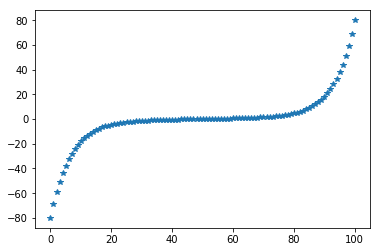

In [22]:
mesh = atom.line_mesh_list[0]
plt.plot(mesh, "*")

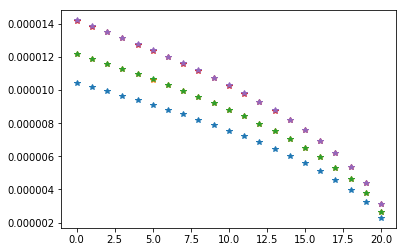

In [46]:
for k in range(5):
    mesh = atom.continuum_mesh_list[k]
    plt.plot(mesh, "*")

read incident background line intensity profile

In [24]:
atom.read_Radiative_Line_intensity(_folder="../data/intensity/Ca_II/")

In [25]:
len(atom.radiative_line_intensity_list)

5

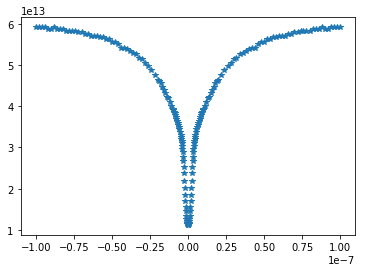

In [26]:
arr = atom.radiative_line_intensity_list[4]

plt.plot(arr[0,:], arr[1,:], "*")

---

## steps to use `AtmosphereC1d` class

In [29]:
slab1d = AtmosphereCls.AtmosphereC1d(1E7, Mesh=np.array([1]))

In [30]:
slab1d.data.Mesh

array([1.])

In [31]:
slab1d = AtmosphereCls.AtmosphereC1d(1E7) # 1E7[cm] = 100[km]
slab1d.readBackgroundIntensity('../data/intensity/continuum/ASTM_E490+PROM7_HI_CaII.dat')

`Mesh` is in relative scale [0,1]

In [ ]:
slab1d.data.Te[0]

In [ ]:
plt.plot( slab1d.data.Mesh, '*' )

In [ ]:
plt.plot( slab1d.data.Spatial, '*' )

- `Te` : electron temperature
- `Ne` : electron density
- `Vt` : turbulent velocity
- `Vd` : Doppler velocity
- `Pg` : gas pressure

In [ ]:
slab1d.setUniform()

In [ ]:
slab1d.data.Te # Ne, Vt, Vd, Pg

---

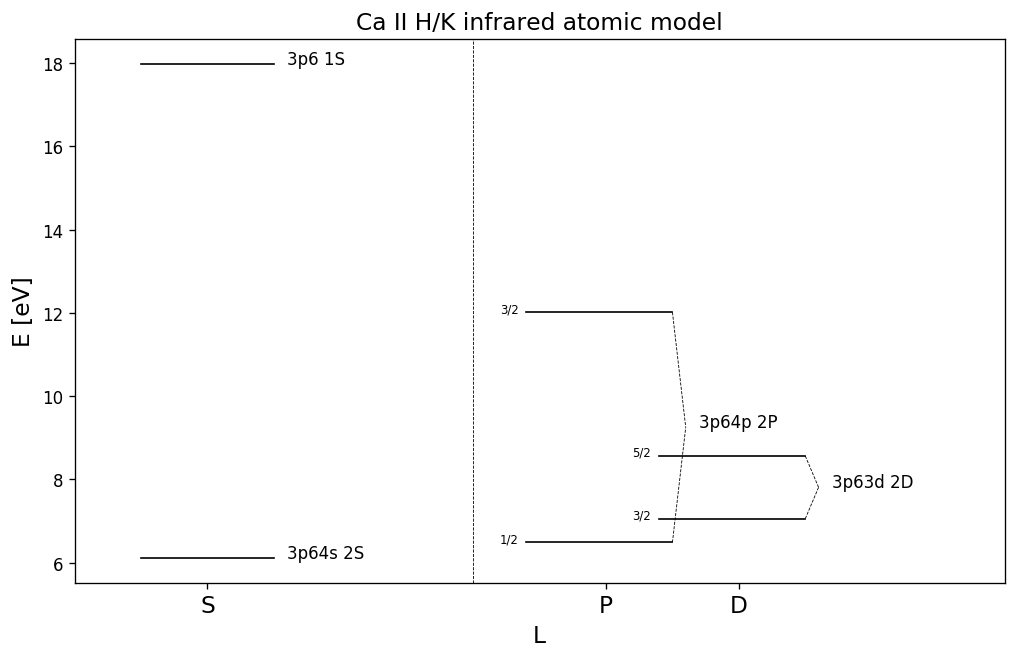

In [40]:
from src.Visual import Grotrian

gro = Grotrian.Grotrian(_atom=atom, _conf_prefix="1s2.2s2.2p6.3s2.")
gro.make_fig(_figsize=(10,6))

---

## (not yet completed) Full Statistical Equilibrium

solve Full Statistical Equilirbium at a single depth point

In [ ]:
def one_depth(_atom, _Te, _Ne, _Vt, _Vd):
    r"""
    calculate the 
        - LTE population
        - SE population (SE : Statistical Equilibrium)
        - SE population of the upper level of each transition
        - C and R matrice while solving SE
        - optically thin relative flux (some constants are removed)

    Parameters
    ----------

    _atom  : AtomCls.Atom() object
        atomic model data structure,
        number of Levels : _atom.nLevel
        number of Line transitions : _atom.nLine
        
    _Te  : scalar variable (np.float, np.double and so on)
        electron temperature, [:math:`K`]
        
    _Ne : scalar variable (np.float, np.double and so on)
        electron density, [:math:`cm^{-3}`]

    Returns
    -------

    _n_LTE : np.double, np.array with shape (_atom.nLevel,)
        Normalized LTE level population.
        :math:`rt = n_j / n_i`, [-]
    
    _n_SE : np.double, np.array with shape (_atom.nLevel,)
        Normalized level population under statistical equilibrium.
        
    _nj_SE : np.double, np.array with shape (_atom.nLine)
        Normalized level population under statistical equilibrium 
        of the upper levels of each line transition.
        
    _Cmat : np.double, np.array with shape (_atom.nLevel, _atom.nLevel)
        C matrix (Collisional related) in solving statistical equilibrium equations.
        
    _Rmat : np.double, np.array with shape (_atom.nLevel, _atom.nLevel)
        R matrix (Radiative related) in solving statistical equilibrium equations.
        
    _rel_flux : np.double, np.array with shape (_atom.nLine,)
        relative flux under the assumption of optically thin. 
        :math:`h \nu n_{j} A_{ji}`, [:math:`erg \; cm^{-3} \; s^{-1}`]
        
    Notes
    -----

    The Statistical equilibrium equations [1]_.
    
    .. math:: \bm{A} \times \bm{n} = \bm{b}
    
    .. math:: \bm{b} = (0,0,0,...,1)^{T}
    
    .. math:: A_{ii} = \sum_{j \neq i} (R_{ij} + C_{ij})
    
    .. math:: A_{ij} = -(R_{ji} + C_{ji}) \quad j \neq i, \; i \neq -1
    
    .. math:: A_{-1,j} = 1
    
    
    The absolute flux under the assumption of optically thin [2]_.
    
    .. math:: F_{ji} = \frac{1}{4 \pi R^{2}} \int_{\Delta V} \epsilon_{ji} dV \quad [erg \; cm^{-2} \; s^{-1}]
    
    where the emissivity :math:`\epsilon_{ji}` is
    
    .. math:: \epsilon_{ji} = h \nu n_{j} A_{ji} \quad [erg \; cm^{-3} \; s^{-1}]
    
    and 
    
    .. math:: \epsilon_{ji} = \int_{\nu} \epsilon_{\nu} d \nu = \int_{\nu} h \nu n_{j} A_{ji} \psi d \nu
    
    References
    ----------

    .. [1] Ivan Hubeny, Dimitri Mihalas, "Theory of Stellar Atmosphere:
        An Introduction to Astrophysical Non-equilibrium
        Quantitative Spectroscopic Analysis",
        Princeton University Press, pp. 283, 2015.
        
    .. [2] John T. Mariska, "The Solar Transition Region", 
        Cambridge University Press, pp. 19, 1992
        
    Examples
    --------
        
        >>> from src import AtomCls, LTELib, ColExcite, SEsolver, OpticallyThin
        >>> file = "/path/to/C_III_Be_like.txt"
        >>> atom = AtomCls.Atom(file)
        >>> n_LTE, n_SE, nj_SE, Cmat, Rmat, rel_flux = main_func(_atom=atom, _Te=3E+04, _Ne=1E+10)
    
    """
    #--- 
    # compute LTE population ratio for each CE transition
    #---
    
    _n_LTE = LTELib.get_LTE_ratio(_erg=_atom.Level.erg[:], _g=_atom.Level.g[:],
                                  _stage=_atom.Level.stage[:], _Te=_Te, _Ne=_Ne)
    
    #--- 
    # we are going to use LTE population ratio to convert C_{ij} to C_{ji},
    # so we need the the LTE population of the lower/upper level of each transition
    #---
    _nTran = _atom.nLine
    _ni_LTE = np.empty(_nTran, dtype=np.double)
    _nj_LTE = np.empty(_nTran, dtype=np.double)
    
    for k in range(_nTran):
        _ni_LTE[k] = _n_LTE[_atom.CE_coe.idxI[k]]
        _nj_LTE[k] = _n_LTE[_atom.CE_coe.idxJ[k]]
    
        
    #--- 
    # compute collision excitation/de-excitation rate coefficient
    #---
    
    _CE_fac = ColExcite.interpolate_CE_fac(_table=atom.CE_table[:,:], _Te=_Te, 
                                           _Te_table=_atom.CE_Te_table[:], 
                                           _f1=_atom.CE_coe.f1[:], _f2=_atom.CE_coe.f2[:])
    
    _CEij = ColExcite.get_CE_rate_coe(_CE_fac=_CE_fac, _Te=_Te, _gi=_atom.CE_coe.gi[:],
                                      _dEij=_atom.CE_coe.dEij[:], _type=_atom.CE_type)

    _CEji = ColExcite.Cij_to_Cji(_Cij=_CEij,  _ni_LTE=_ni_LTE, _nj_LTE=_nj_LTE)
    
    #--- 
    # compute collision ionization rate coefficient
    #---
    
    
    #---
    # solve SE equations under the assumption of "Corona equilibrium"
    # that is, mean intensity = 0
    #---
    
    #_nLevel = _atom.nLevel
    
    #_Cmat = np.zeros((_nLevel, _nLevel), dtype=np.double)
    #SEsolver.setMatrixC(_Cmat=_Cmat[:,:], _Cji=_CEji[:], _Cij=_CEij[:],
    #                    _idxI=_atom.CE_coe.idxI[:], _idxJ=_atom.CE_coe.idxJ[:], _Ne=_Ne)
    
    #_Rmat     = np.zeros((_nLevel, _nLevel), dtype=np.double)
    #_Rji_stim = np.zeros(_atom.Line.AJI[:].shape, dtype=np.double)
    #_Rij      = np.zeros(_atom.Line.AJI[:].shape, dtype=np.double)
    #SEsolver.setMatrixR(_Rmat=_Rmat[:,:], _Rji_spon=_atom.Line.AJI[:],
    #                    _Rji_stim=_Rji_stim[:], _Rij=_Rij, 
    #                    _idxI=_atom.Line.idxI[:], _idxJ=_atom.Line.idxJ[:])

    #_n_SE = SEsolver.solveSE(_Rmat=_Rmat[:,:], _Cmat=_Cmat[:,:])
    
    #---
    # compute relative flux for each transition
    #---
    #_nj_SE = np.empty(_nTran, dtype=np.double)
    #for k in range(_nTran):
    #    _nj_SE[k] = _n_SE[_atom.CE_coe.idxJ[k]]
    
    #_rel_flux = Thin.get_relative_flux(_AJI=_atom.Line.AJI[:], 
    #                                   _f0=_atom.Line.f0[:], _nj=_nj_SE[:])
    
    #return _n_LTE, _n_SE, _nj_SE, _Cmat, _Rmat, _rel_flux 



In [ ]:
z = 0
one_depth(_atom=atom, 
          _Te=slab1d.data.Te[z],_Ne=slab1d.data.Ne[z],
          _Vt=slab1d.data.Vt[z], _Vd=slab1d.data.Vd[z])